In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
aisles_df=pd.read_csv("aisles.csv")
products_df=pd.read_csv("products.csv")
departments_df=pd.read_csv("departments.csv")
orders_df=pd.read_csv("orders.csv")
order_products_prior_df=pd.read_csv("order_products__prior.csv")
order_products_train_df=pd.read_csv("order_products__train.csv")

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
print("Orders.csv")
rows=len(orders_df)
print('Rows:',rows)
users=len(orders_df.user_id.value_counts())
print('Users:',users)

Orders.csv
Rows: 3421083
Users: 206209


In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
print("Products.csv")
products=len(products_df)
print('Products:',products)

Products.csv
Products: 49688


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
print("Aisles.csv")
aisles=len(aisles_df)
print('Aisles:',aisles)

Aisles.csv
Aisles: 134


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
print("Departments.csv")
departments=len(departments_df)
print('Departments:',departments)

Departments.csv
Departments: 21


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
count=orders_df.eval_set.value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


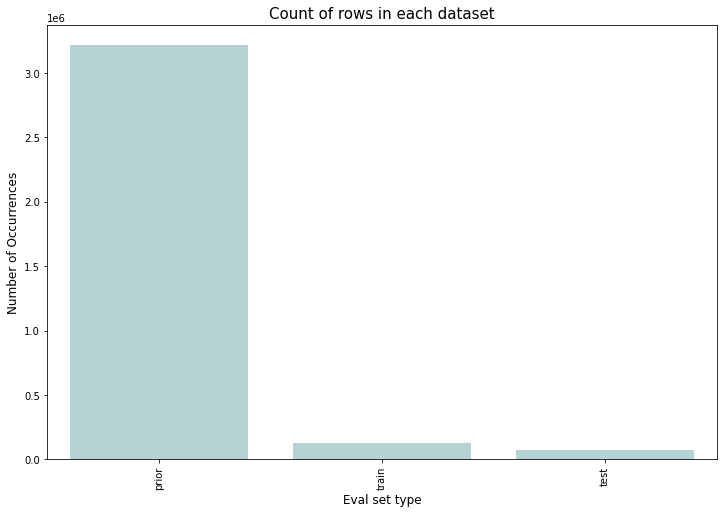

In [ ]:
count=orders_df.eval_set.value_counts()
count
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.3, color='teal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def count(x):
    return len(np.unique(x))

count = orders_df.groupby("eval_set")["user_id"].aggregate(count)
count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


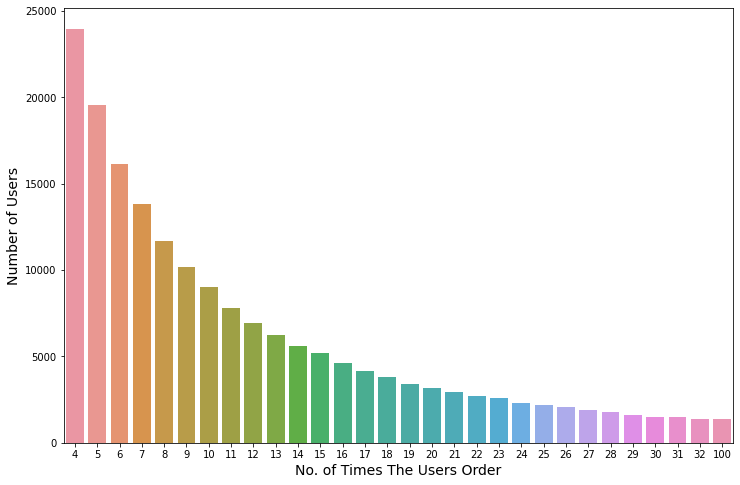

In [ ]:
count = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count = count.order_number.value_counts()
count = count.nlargest(30)

plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=1.0)
plt.ylabel('Number of Users', fontsize=14)
plt.xlabel('No. of Times The Users Order', fontsize=14)
plt.xticks(rotation='horizontal')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


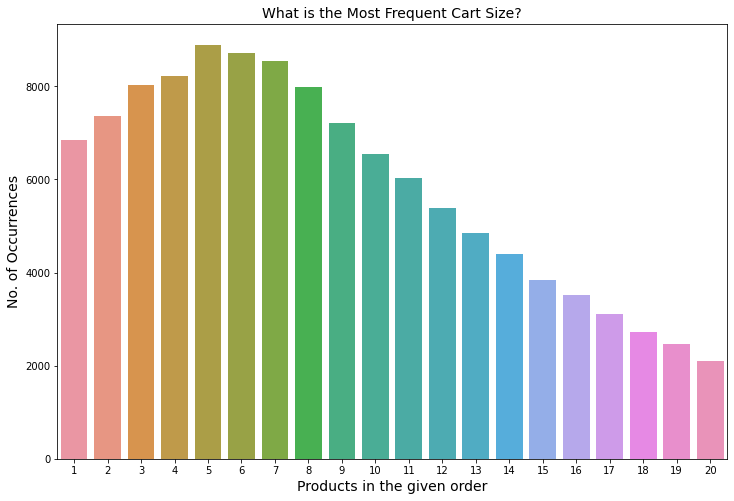

In [ ]:
basket = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count = basket.add_to_cart_order.value_counts()
count = count.nlargest(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=1.0)
plt.ylabel('No. of Occurrences', fontsize=14)
plt.xlabel('Products in the given order', fontsize=14)
plt.title('What is the Most Frequent Cart Size?', fontsize=14)
plt.xticks(rotation='horizontal')
plt.show()

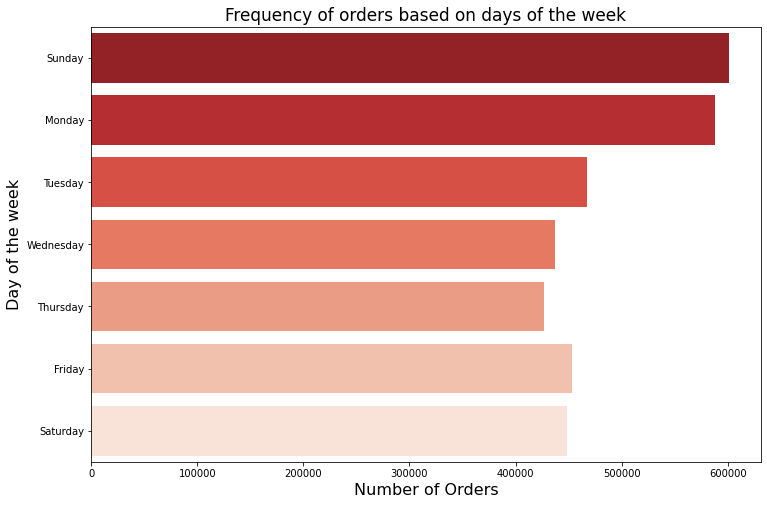

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y="order_dow", data=orders_df,palette="Reds_r")
plt.ylabel('Day of the week', fontsize=16)
plt.xlabel('Number of Orders', fontsize=16)
plt.xticks(rotation='horizontal')
plt.yticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title("Frequency of orders based on days of the week", fontsize=17)
plt.show()

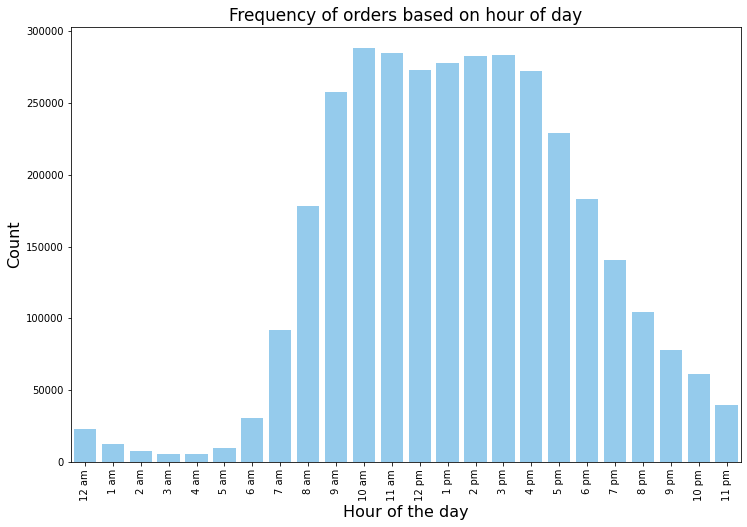

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color='lightskyblue')
plt.ylabel('Count', fontsize=16)
plt.xlabel('Hour of the day', fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12 am','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm'],rotation='vertical')
plt.title("Frequency of orders based on hour of day", fontsize=17)
plt.show()

Text(0.5, 1.0, 'Orders on Sunday')

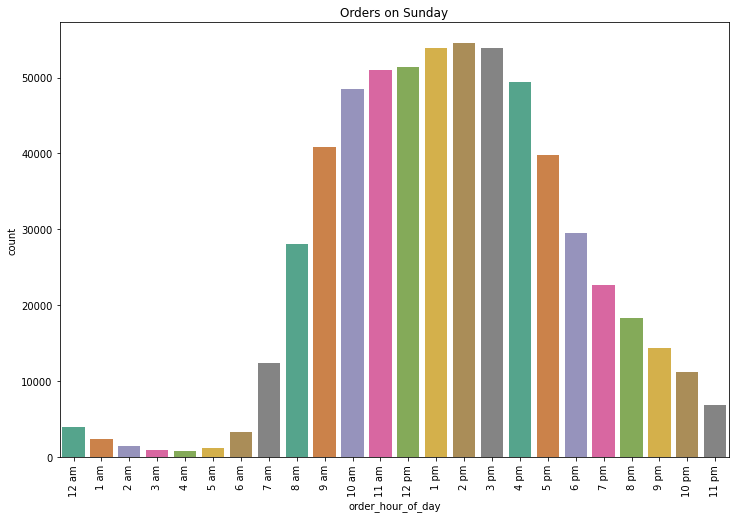

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data=orders_df[orders_df['order_dow']==0],palette="Dark2", alpha=0.8)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12 am','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm'],rotation='vertical')
plt.title("Orders on Sunday")

Text(0.5, 1.0, 'Orders on Monday')

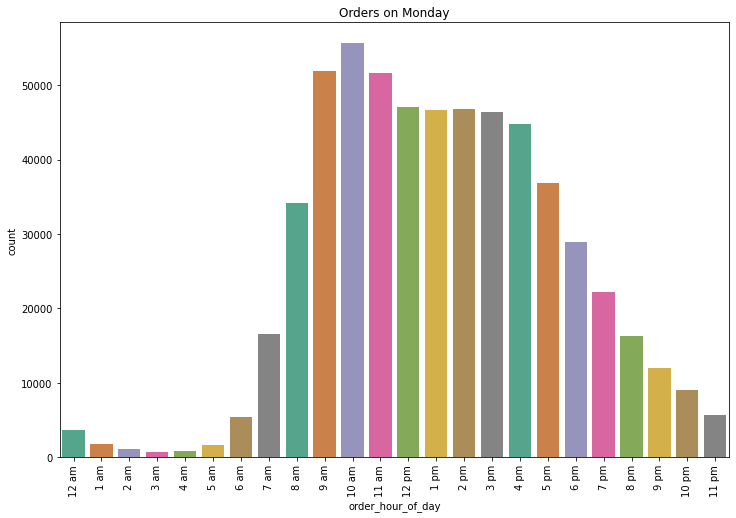

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data=orders_df[orders_df['order_dow']==1],palette="Dark2", alpha=0.8)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12 am','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm'],rotation='vertical')
plt.title("Orders on Monday")

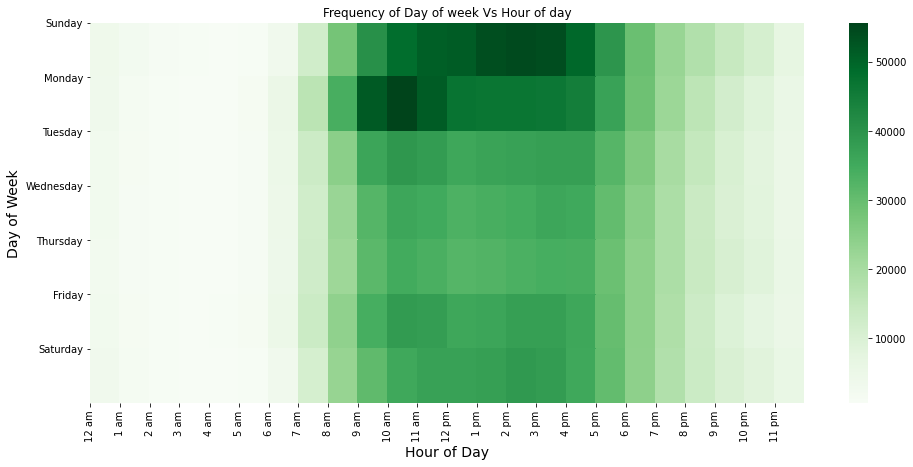

In [ ]:
freq = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
freq = freq.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(16,7))
sns.heatmap(freq,cmap="Greens")
plt.ylabel('Day of Week', fontsize=14)
plt.xlabel('Hour of Day', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12 am','1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm','10 pm','11 pm'],rotation='vertical')
plt.yticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation='horizontal')
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

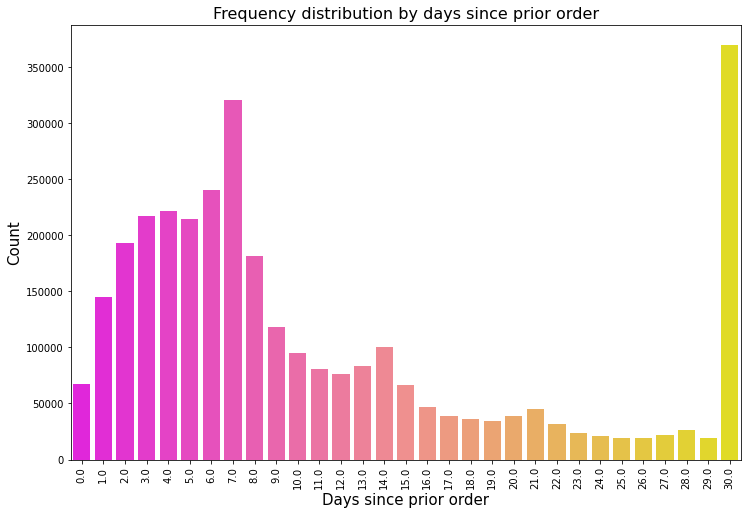

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, palette="spring")
plt.ylabel('Count', fontsize=15)
plt.xlabel('Days since prior order', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=16)
plt.show()

New Section

In [ ]:
order_products_df = order_products_prior_df.append(order_products_train_df)
order_products_df.shape

(33819106, 4)

In [ ]:
order_products_df = order_products_df.merge(products_df, on ='product_id', how='left')
order_products_df = order_products_df.merge(aisles_df, on ='aisle_id', how='left')
order_products_df = order_products_df.merge(departments_df, on ='department_id', how='left')
order_products_df = order_products_df.merge(orders_df, on='order_id', how='left')
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [ ]:
count=order_products_df['product_name'].value_counts().reset_index().head(10)
count.columns=['product_name','Frequency_of_Products']
count

,product_name,Frequency_of_Products
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


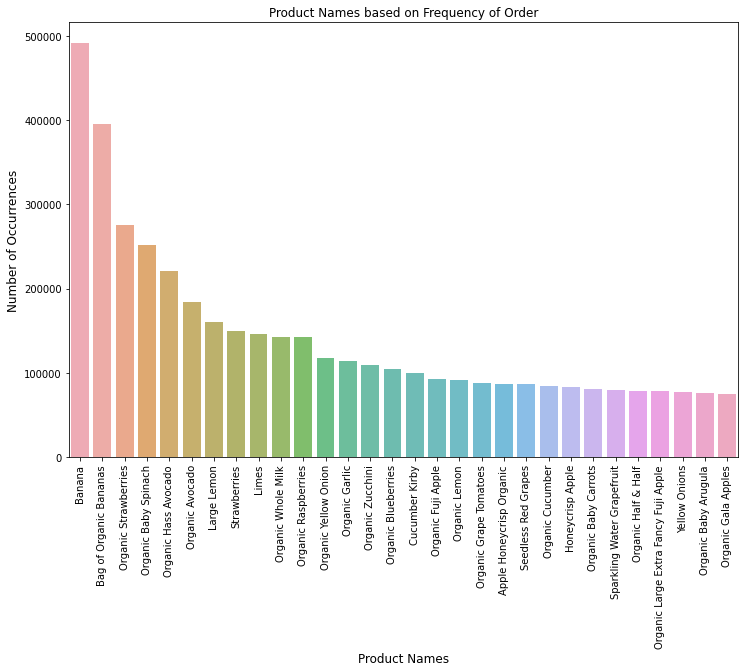

In [ ]:
count = order_products_df['product_name'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product Names', fontsize=12)
plt.title("Product Names based on Frequency of Order")
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


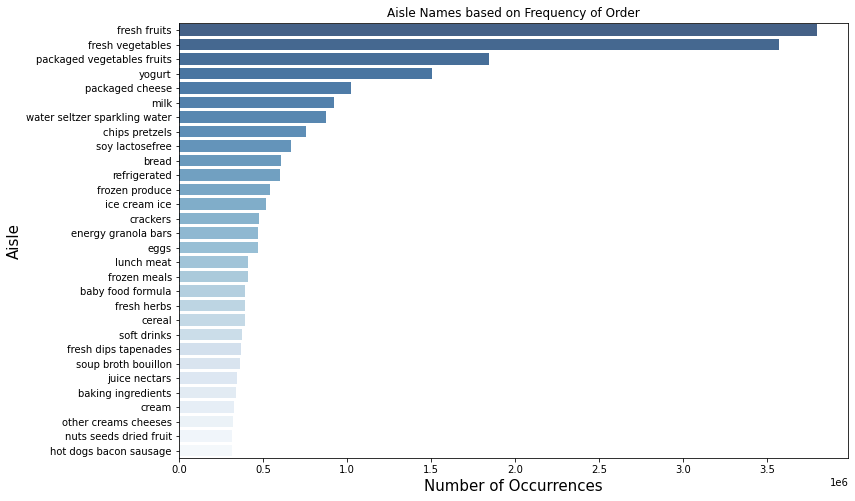

In [ ]:
count = order_products_df['aisle'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(count.values,count.index, alpha=0.8, palette="Blues_r")
plt.xlabel('Number of Occurrences', fontsize=15)
plt.ylabel('Aisle', fontsize=15)
plt.xticks(rotation='horizontal')
plt.title("Aisle Names based on Frequency of Order")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


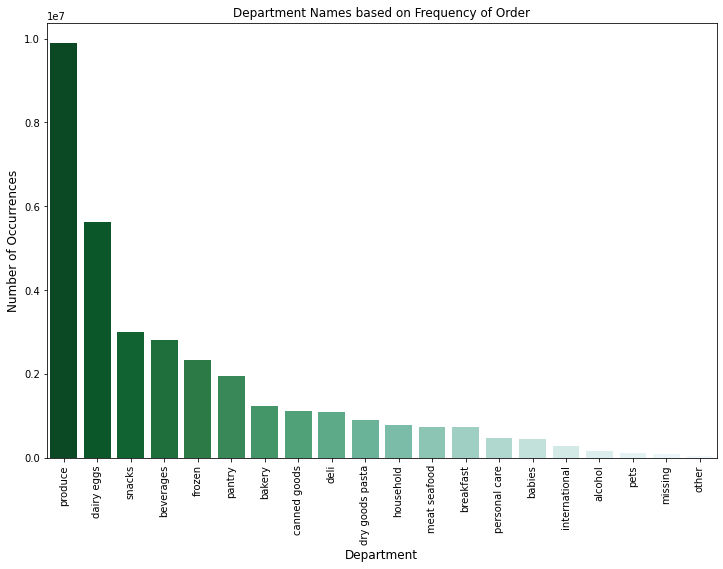

In [ ]:
count = order_products_df['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=1.0,palette="BuGn_r")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department Names based on Frequency of Order")
plt.xticks(rotation='vertical')
plt.show()

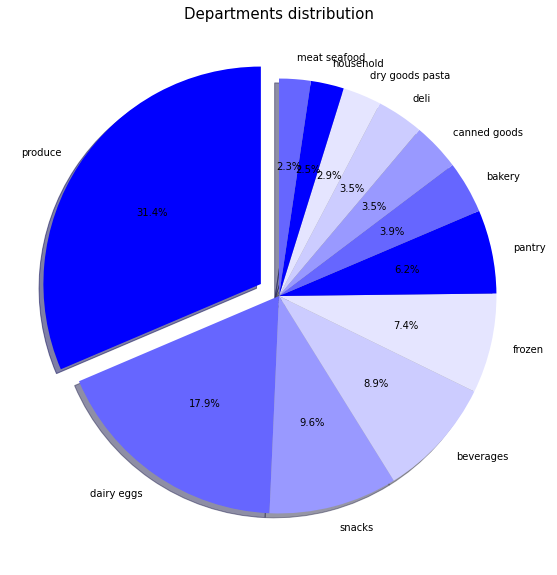

In [ ]:
plt.figure(figsize=(10,10))
temp_series = order_products_df['department'].value_counts().head(12)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
chart=(0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
colors = ['#0000ff','#6666ff','#9999ff','#ccccff','#e5e5ff']
plt.pie(sizes,explode=chart,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Departments distribution", fontsize=15)
plt.show()

Most important Aisles in each Department (by number of Products)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

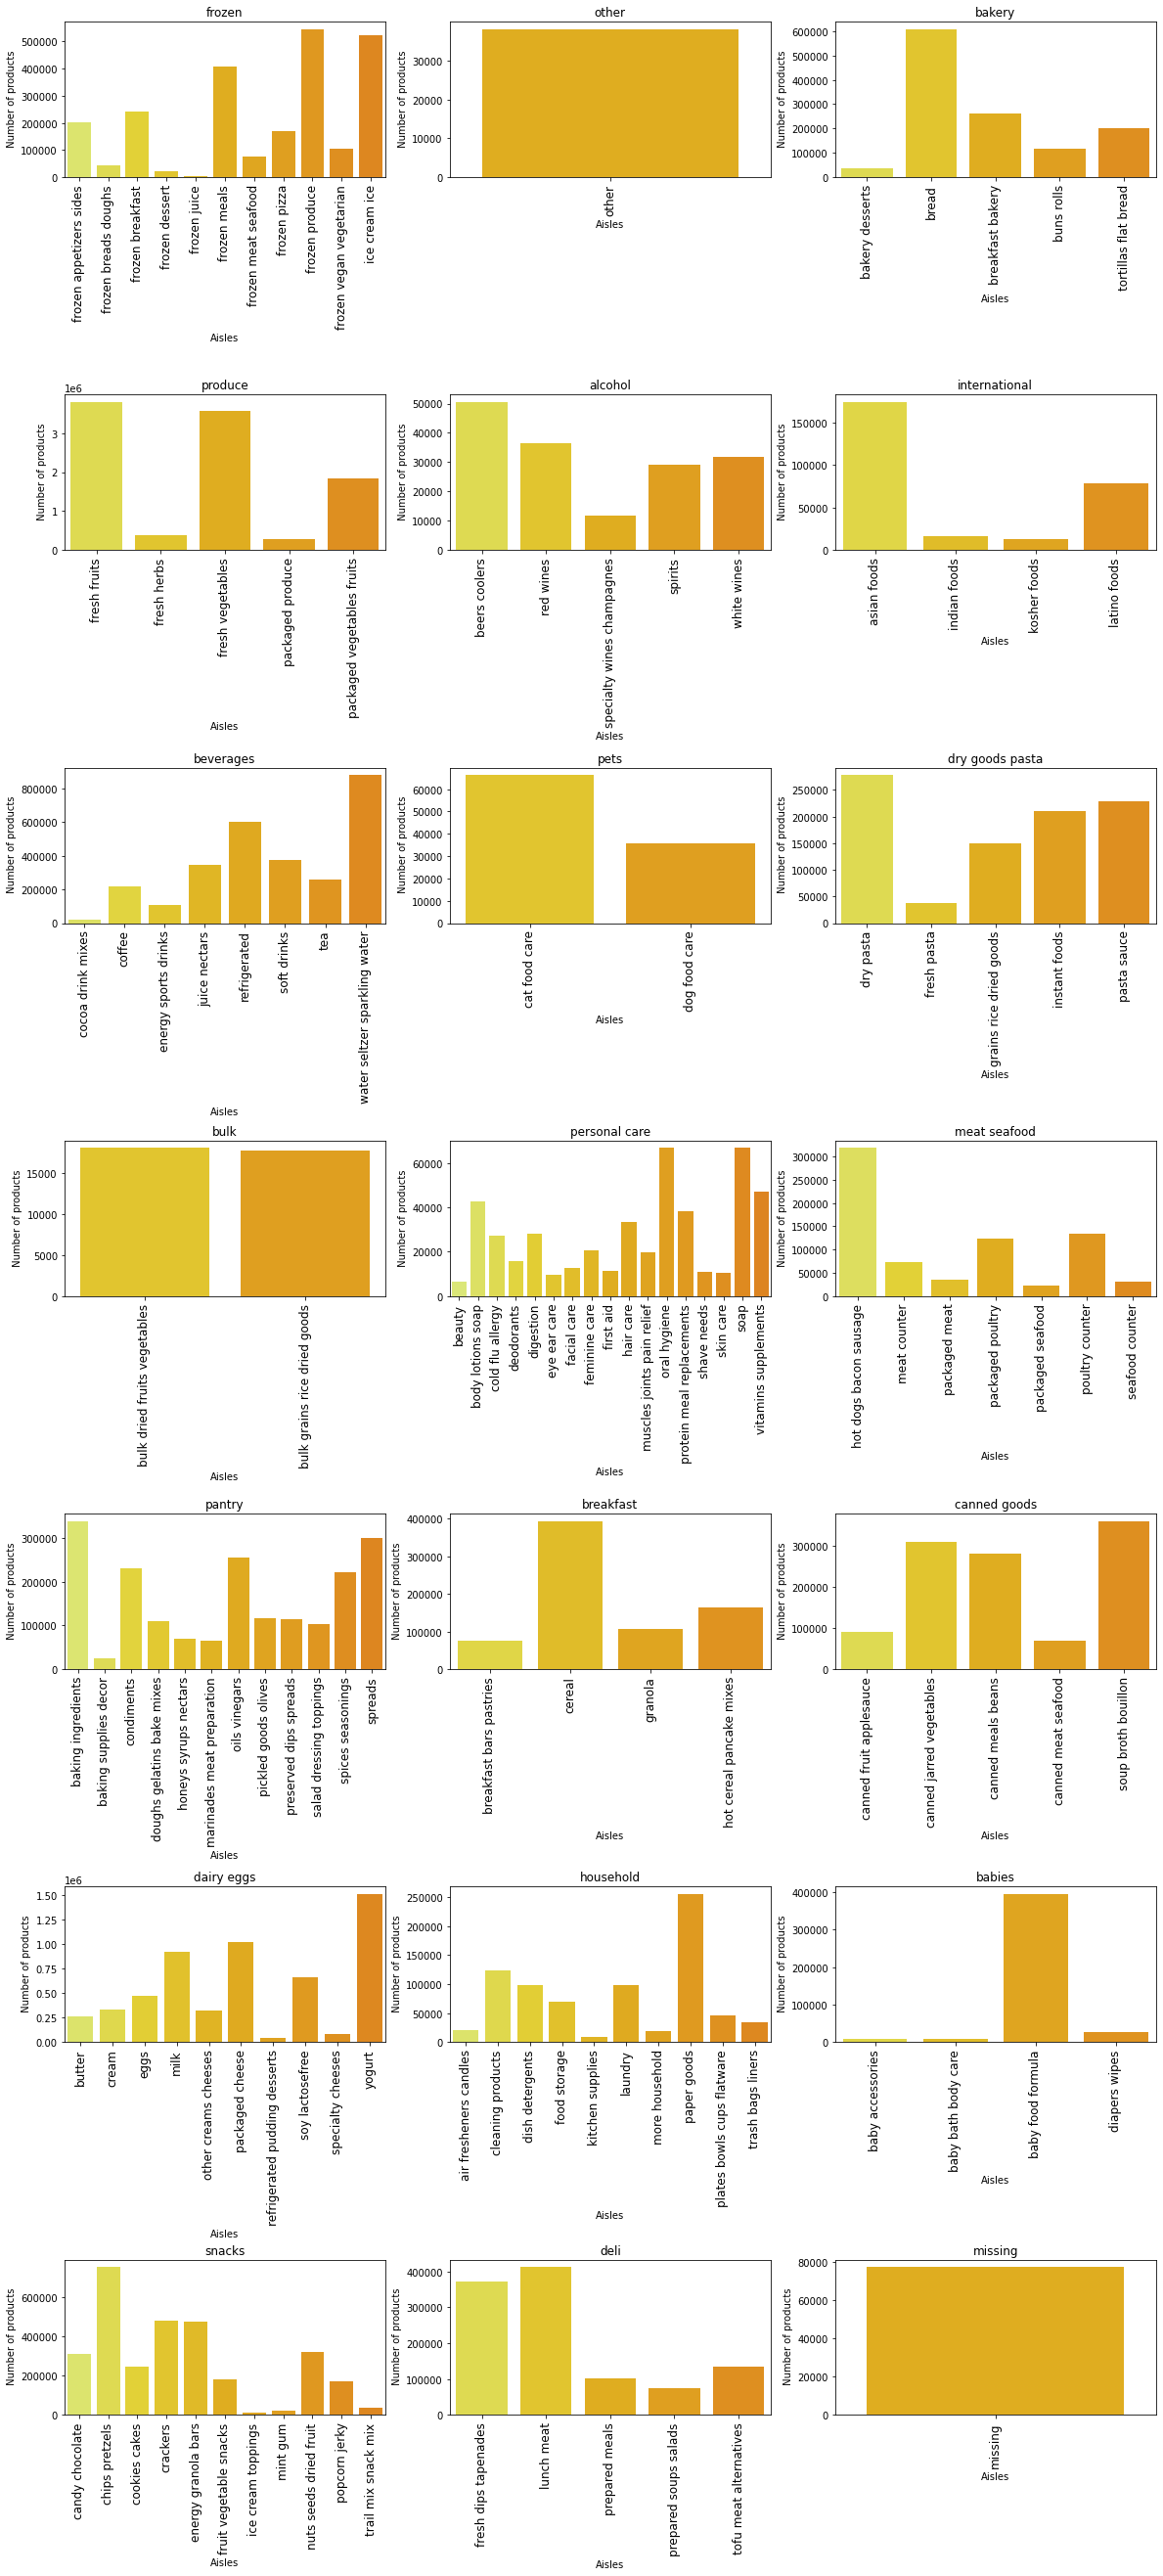

In [ ]:
fig,ax = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for i, j in enumerate(ax.flatten()):
    if(i < len(departments_df["department"])):
        data=order_products_df[order_products_df.department == departments_df.loc[i,"department"]].groupby(['aisle']).count()['product_id'].to_frame().reset_index()
        g = sns.barplot(data.aisle, data.product_id ,palette="Wistia", ax=j)
        j.set_title('{}'.format(departments_df.loc[i,"department"]))
        j.set(xlabel = "Aisles", ylabel=" Number of products")
        g.set_xticklabels(labels = data.aisle,rotation=90, fontsize=12)

Best Selling Aisles in each Department (number of Orders)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

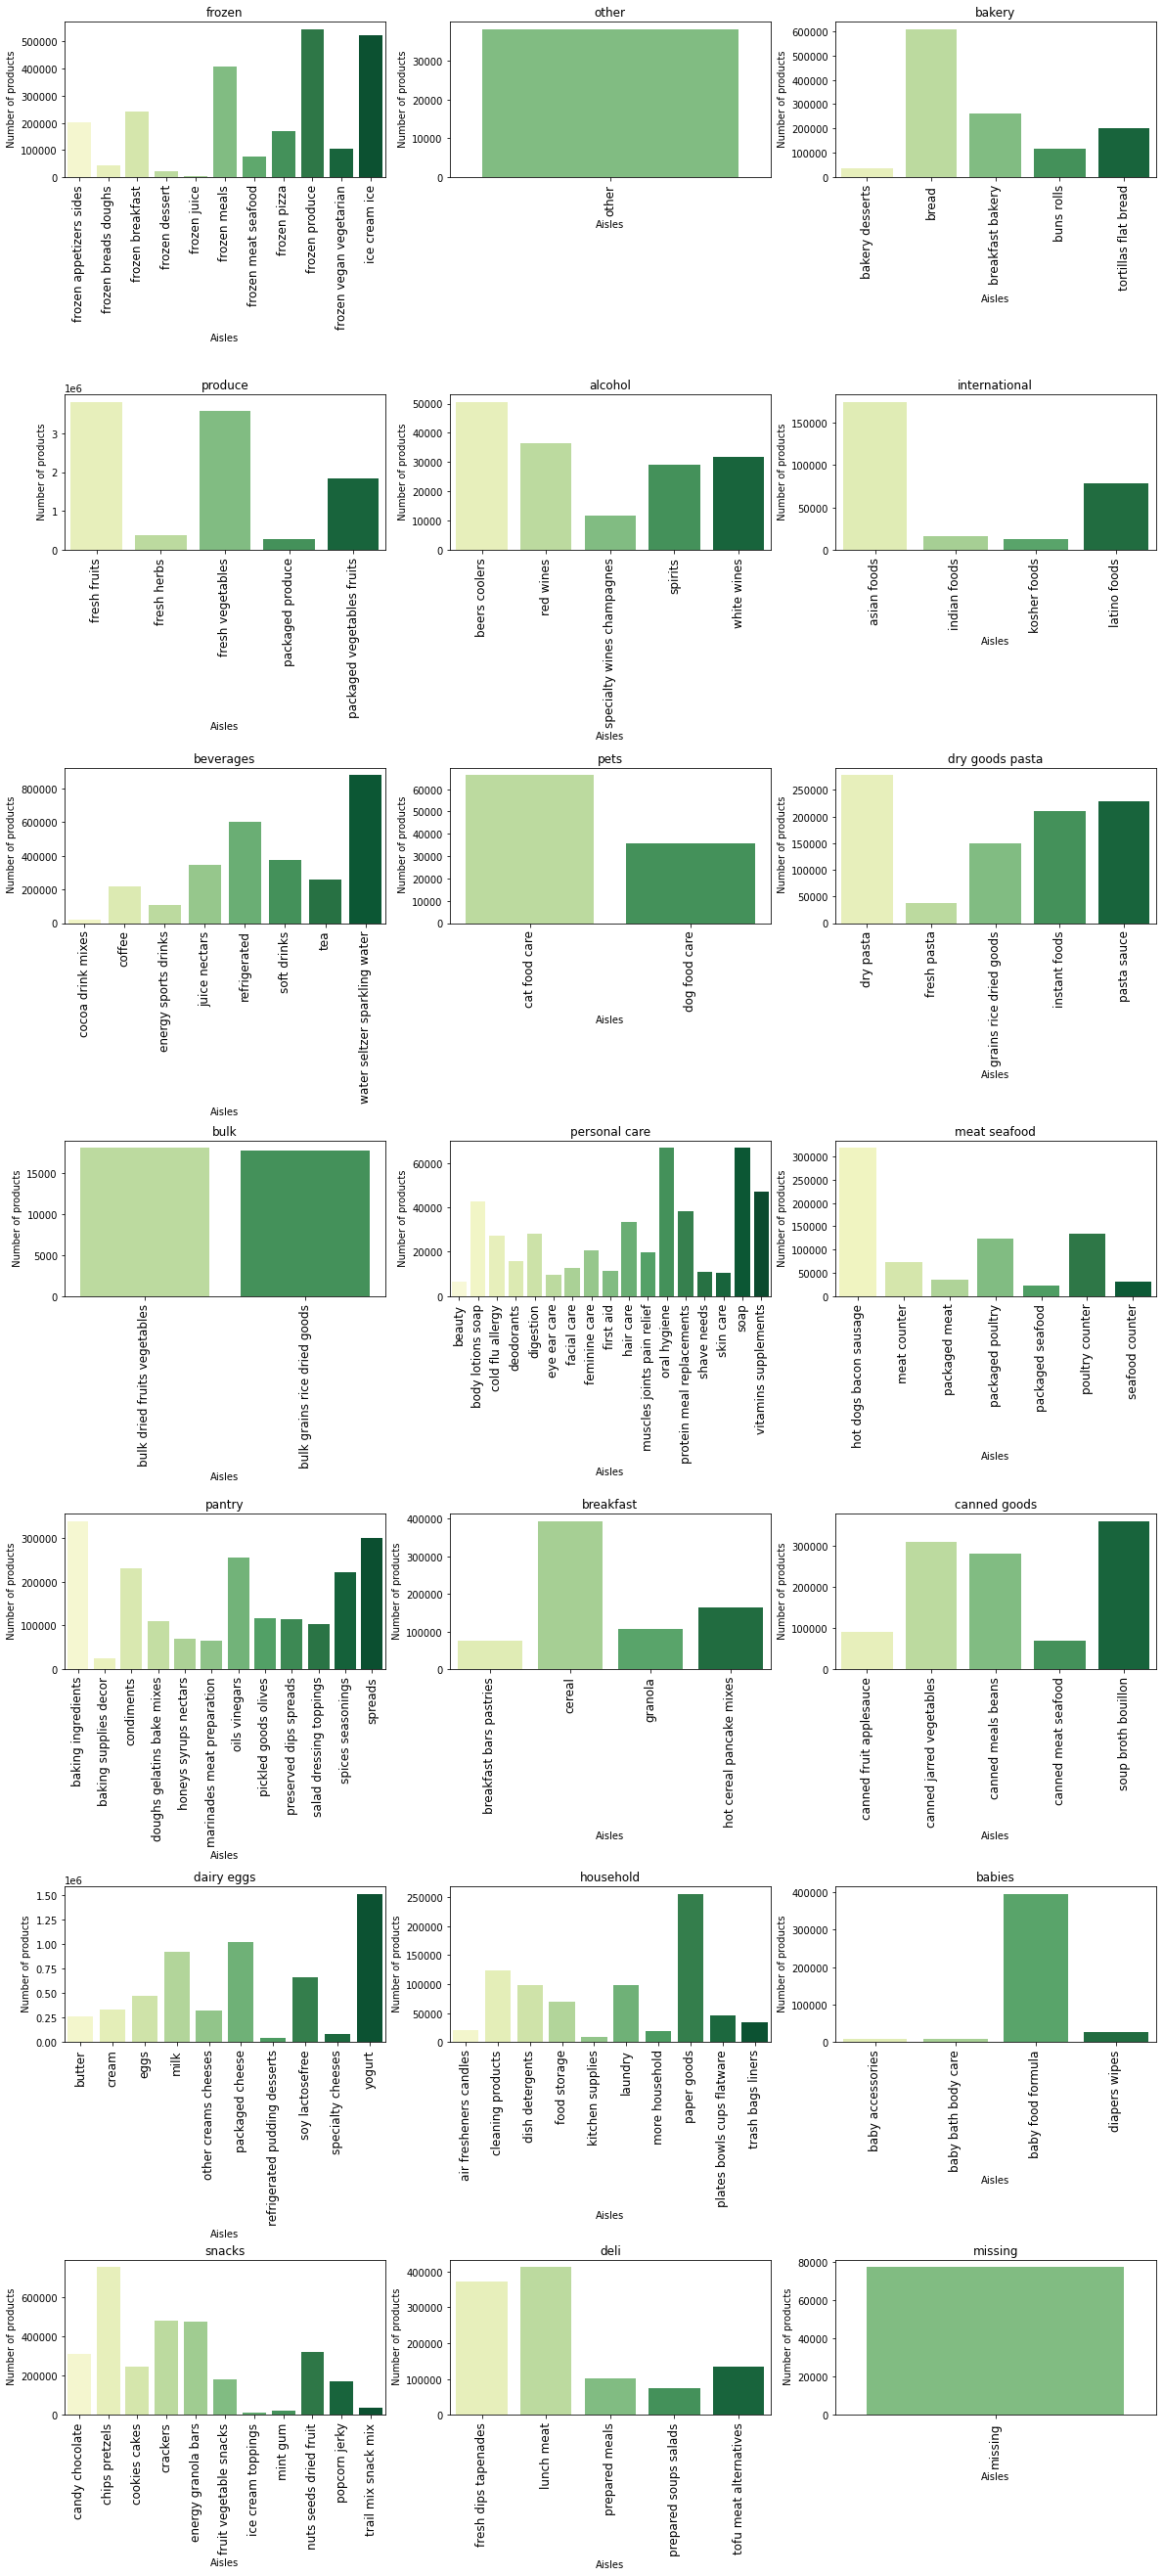

In [ ]:
fig,ax = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for i, j in enumerate(ax.flatten()):
    if(i < len(departments_df["department"])):
        data=order_products_df[order_products_df.department == departments_df.loc[i,"department"]].groupby(['aisle']).count()['order_id'].to_frame().reset_index()
        g = sns.barplot(data.aisle, data.order_id ,palette="YlGn", ax=j)
        j.set_title('{}'.format(departments_df.loc[i,"department"]))
        j.set(xlabel = "Aisles", ylabel=" Number of products")
        g.set_xticklabels(labels = data.aisle,rotation=90, fontsize=12)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


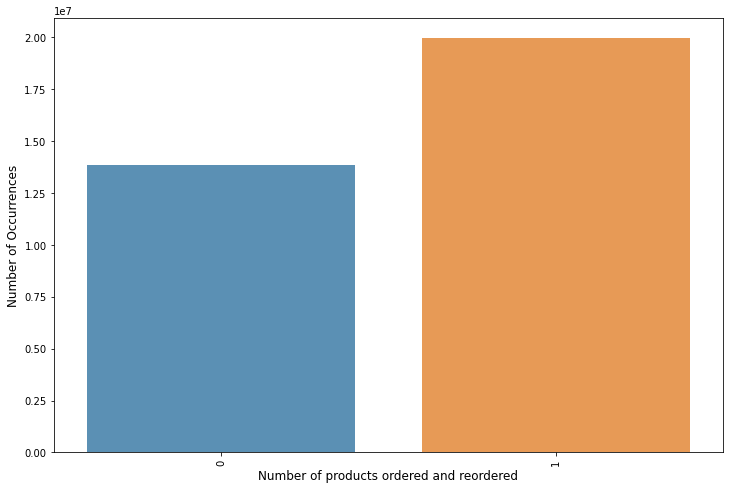

In [ ]:
count = order_products_df['reordered'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products ordered and reordered', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
order_products_df.reordered.sum() / order_products_df.shape[0]

0.5900617242809434

In [ ]:
aisles= order_products_df.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'Orders','sum':'Reorders'})
aisles = aisles.sort_values('Orders', ascending=False).reset_index()

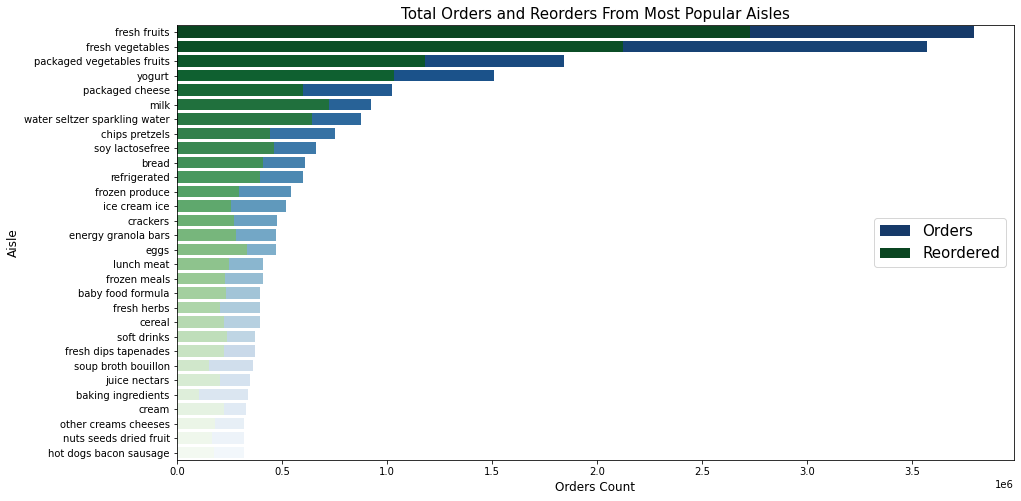

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(y = aisles.aisle[0:30], x = aisles.Orders[0:30], palette='Blues_r', label = "Orders")
sns.barplot(y = aisles.aisle[0:30], x = aisles.Reorders[0:30], palette='Greens_r', label = "Reordered")
plt.ylabel("Aisle",fontsize=12)
plt.xlabel("Orders Count",fontsize=12)
plt.title("Total Orders and Reorders From Most Popular Aisles",fontsize=15)
plt.legend(loc = 5, prop={'size': 15})
plt.show()

In [ ]:
aisles["reorder_ratio"] = aisles.Reorders/aisles.Orders
aisles = aisles.sort_values("reorder_ratio", ascending=False).reset_index()

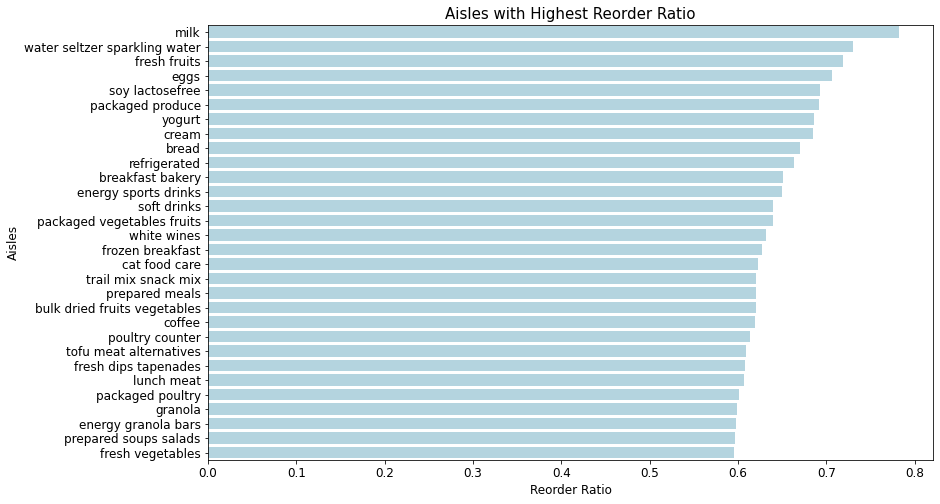

In [ ]:
plt.figure(figsize = (13,8))
sns.barplot(y = aisles.aisle[0:30], x = aisles.reorder_ratio[0:30], color='lightblue')
plt.ylabel("Aisles",fontsize=12)
plt.xlabel("Reorder Ratio",fontsize=12)
plt.title("Aisles with Highest Reorder Ratio",fontsize=15)
plt.tick_params(axis = 'both', labelsize = 12)
plt.show()

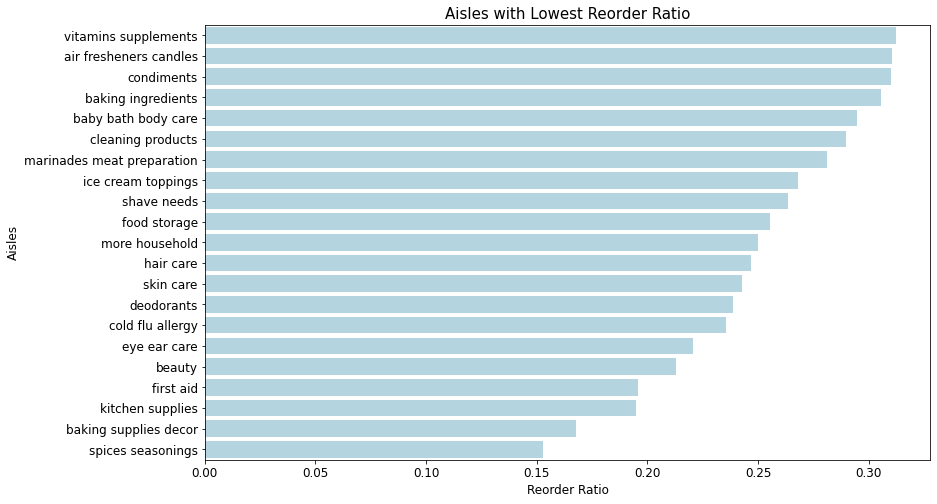

In [ ]:
plt.figure(figsize = (13,8))
sns.barplot(y = aisles.aisle[-21:], x = aisles.reorder_ratio[-21:], color='lightblue')
plt.ylabel("Aisles",fontsize=12)
plt.xlabel("Reorder Ratio",fontsize=12)
plt.title("Aisles with Lowest Reorder Ratio",fontsize=15)
plt.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [ ]:
products = order_products_df.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
products = products.sort_values('total', ascending=False).reset_index()

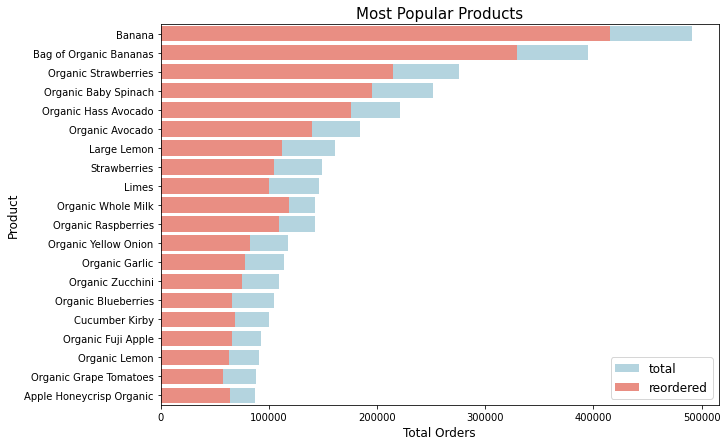

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(y = products.product_name[0:20], x = products.total[0:20], color='lightblue', label = "total")
sns.barplot(y = products.product_name[0:20], x = products.reorders[0:20], color='salmon', label = "reordered")
plt.ylabel("Product",fontsize=12)
plt.xlabel("Total Orders",fontsize=12)
plt.title("Most Popular Products",fontsize=15)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
departments= order_products_df.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'Orders','sum':'Reorders'})
departments = departments.sort_values('Orders', ascending=False).reset_index()

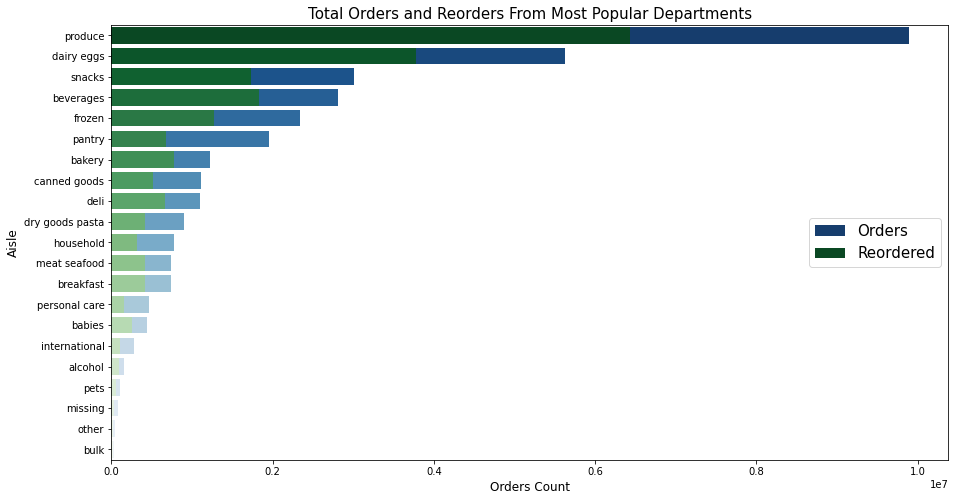

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(y = departments.department[0:30], x = departments.Orders[0:30], palette='Blues_r', label = "Orders")
sns.barplot(y = departments.department[0:30], x = departments.Reorders[0:30], palette='Greens_r', label = "Reordered")
plt.ylabel("Aisle",fontsize=12)
plt.xlabel("Orders Count",fontsize=12)
plt.title("Total Orders and Reorders From Most Popular Departments",fontsize=15)
plt.legend(loc = 5, prop={'size': 15})
plt.show()

In [ ]:
products["reorder_ratio"] = products.reorders/products.total
products.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35213,"Energy Shot, Grape Flavor",22,20,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23918,Bars Peanut Butter,69,62,0.898551
24218,Soy Crisps Lightly Salted,67,60,0.895522


In [ ]:
users = order_products_df.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [ ]:
users = users.merge(products, on='product_name', how='left')
users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


In [ ]:
cumulative = users.sort_values("total_users", ascending=False)
cumulative['cumulative_users'] = cumulative['total_users'].cumsum()
cumulative = cumulative.reset_index(drop=True)
cumulative.head()

,product_name,total_users,total,reorders,reorder_ratio,cumulative_users
0,Banana,76125,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
2,Organic Strawberries,61129,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939,0.774474,259675
4,Large Lemon,48614,160792,112178,0.697659,308289


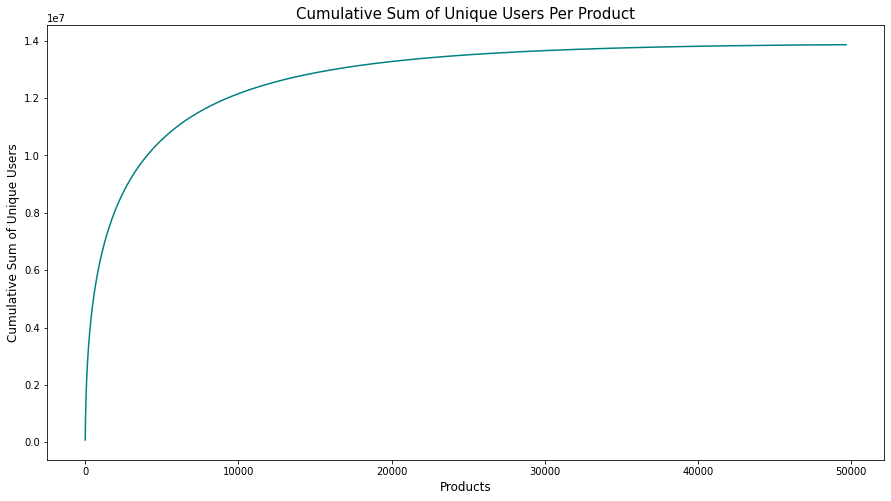

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=cumulative.index, y=cumulative.cumulative_users,color='teal')
plt.xlabel("Products", fontsize = 12)
plt.ylabel("Cumulative Sum of Unique Users", fontsize = 12)
plt.title("Cumulative Sum of Unique Users Per Product", fontsize = 15)
plt.show()

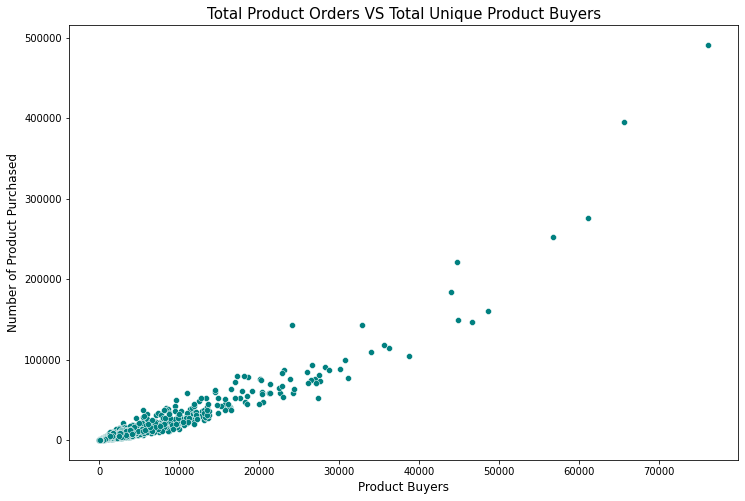

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y = users.total, x = users.total_users,color="teal")
plt.xlabel("Product Buyers",fontsize = 12)
plt.ylabel("Number of Product Purchased",fontsize=12)
plt.title("Total Product Orders VS Total Unique Product Buyers",fontsize=15)
plt.show()

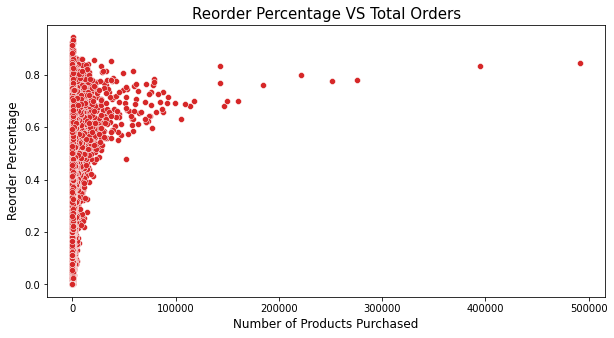

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = users.total, y = users.reorder_ratio, color = color[3])
plt.xlabel("Number of Products Purchased",fontsize = 12)
plt.ylabel("Reorder Percentage",fontsize = 12)
plt.title("Reorder Percentage VS Total Orders",fontsize = 15)
plt.show()

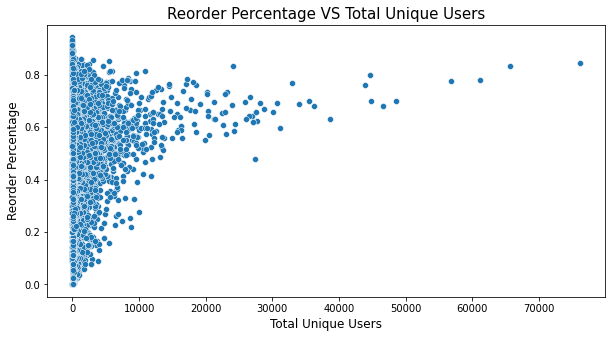

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = users.total_users, y = users.reorder_ratio, color = color[0])
plt.xlabel("Total Unique Users",fontsize = 12)
plt.ylabel("Reorder Percentage",fontsize = 12)
plt.title("Reorder Percentage VS Total Unique Users",fontsize = 15)
plt.show()

In [ ]:
users['Organic'] = users.product_name.str.contains("Organic")
users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


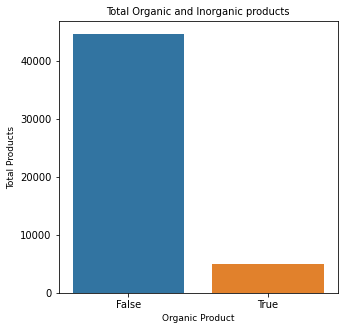

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = users.groupby('Organic').size().index, y = users.groupby('Organic').size().values)
plt.xlabel("Organic Product", size = 9)
plt.ylabel("Total Products", size = 9)
plt.title("Total Organic and Inorganic products", size = 10)
plt.show()

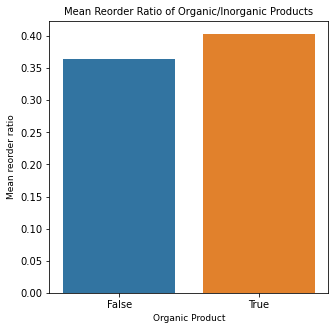

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = users.groupby('Organic')['reorder_ratio'].mean().index, y = users.groupby('Organic')['reorder_ratio'].mean().values)
plt.xlabel("Organic Product", size = 9)
plt.ylabel("Mean reorder ratio", size = 9)
plt.title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

In [ ]:
add_to_cart = order_products_df.groupby('add_to_cart_order')['reordered'].mean().reset_index()
add_to_cart.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


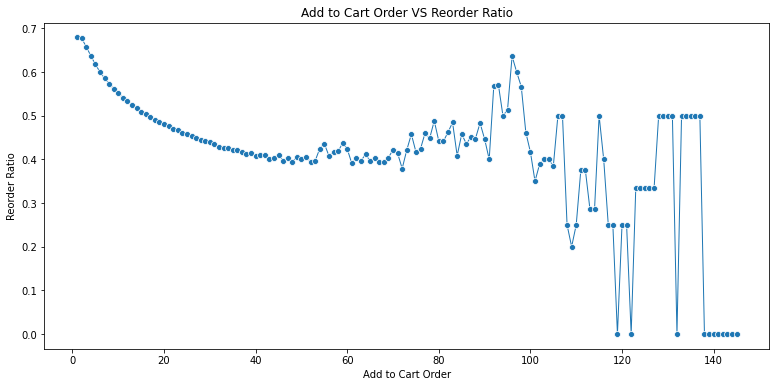

In [ ]:
plt.figure(figsize=(13,6))
sns.lineplot(x=add_to_cart.add_to_cart_order, y=add_to_cart.reordered, lw = 1, marker='o',color='Green')
plt.xlabel("Add to Cart Order")
plt.ylabel("Reorder Ratio")
plt.title("Add to Cart Order VS Reorder Ratio")
plt.show()

In [ ]:
popular_products = order_products_df.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
popular_products = popular_products.sort_values(['order_dow', 'counts'], ascending=[True, False])
popular_products = popular_products.groupby('order_dow').head(5).reset_index(drop = True)

<Figure size 1440x720 with 0 Axes>

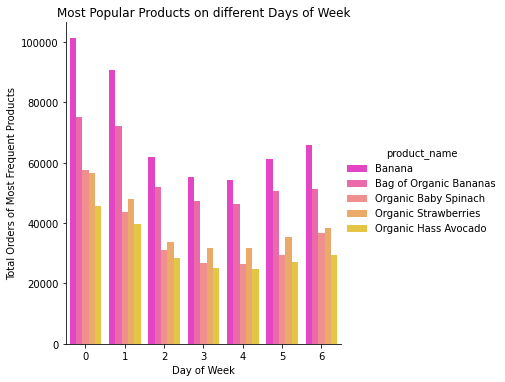

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x="order_dow", y="counts", hue="product_name", data=popular_products, kind="bar",palette="spring")
plt.xlabel("Day of Week")
plt.ylabel("Total Orders of Most Frequent Products")
plt.title("Most Popular Products on different Days of Week")
plt.savefig("Most Popular Products on Different Days of Week.png")